In [1]:
from pgnano.stats_analysis.primitives import PGPoreType
from pgnano.stats_analysis.jupyter_data_preparation import flatten_sample_data
from functools import partial
from pgnano.stats_analysis.coding_analysis_scripts import *
from scipy.stats import geom, halfnorm, norm
from scipy.linalg import lstsq
from scipy.fft import fft
from itertools import repeat
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
import statistics
from math import sqrt
from scipy.stats import laplace

In [2]:
signal_data, chunk_data = flatten_sample_data(PGPoreType.P9_4_1,100)
error = transform_signal_to_error(signal_data[0])
code = transform_error_to_code(error)
start = 250
size = 250
limit = start + size

['/data/datananoraw/data_analysis/9_4_1/0792a506-batch11.pod5', '/data/datananoraw/data_analysis/9_4_1/13ccd92f-batch33.pod5', '/data/datananoraw/data_analysis/9_4_1/16723ac7-batch20.pod5', '/data/datananoraw/data_analysis/9_4_1/23a8b088-batch20.pod5', '/data/datananoraw/data_analysis/9_4_1/3824828f-batch12.pod5', '/data/datananoraw/data_analysis/9_4_1/5524fc3c-batch13.pod5', '/data/datananoraw/data_analysis/9_4_1/6f82bcb6-batch28.pod5', '/data/datananoraw/data_analysis/9_4_1/93f9b40d-batch20.pod5', '/data/datananoraw/data_analysis/9_4_1/9a6e2862-batch36.pod5', '/data/datananoraw/data_analysis/9_4_1/af5138bf-batch7.pod5', '/data/datananoraw/data_analysis/9_4_1/b8feca29-batch25.pod5', '/data/datananoraw/data_analysis/9_4_1/bb5fa810-batch19.pod5', '/data/datananoraw/data_analysis/9_4_1/df68bb8f-batch3.pod5', '/data/datananoraw/data_analysis/9_4_1/e1e34260-batch11.pod5', '/data/datananoraw/data_analysis/9_4_1/e2564fd3-batch22.pod5']
[('/data/datananoraw/data_analysis/9_4_1/af5138bf-batch7

In [3]:
bit = 8
low_histogram_error, high_histogram_error = get_splitted_histograms(error,bit)

In [4]:
def estimate_b_laplace(data, mean):
    return sum(abs(data - mean))/len(data)

In [5]:
mu = np.mean(error)
b = estimate_b_laplace(error, mu)

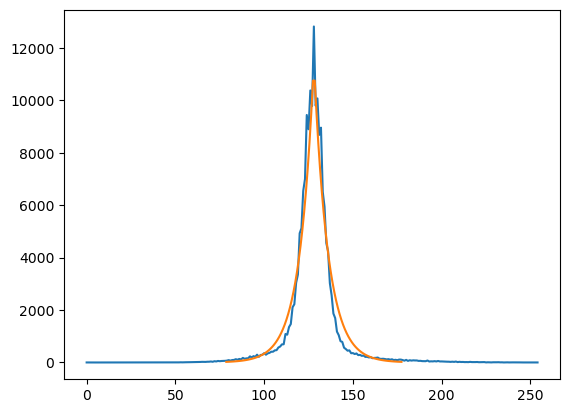

In [6]:
plt.plot(np.bincount(np.uint8((error & 0xFF) + 128)))
x = np.linspace(laplace.ppf(0.001,mu,b),laplace.ppf(0.999,mu,b),100)
plt.plot(x + 128,laplace.pdf(x,mu,b)*len(error))

In [7]:
#plt.plot()
x = np.arange(0,256,1)
#x = np.linspace(laplace.ppf(0.001,mu,b),laplace.ppf(0.999,mu,b),256)
plt.plot(x, np.bincount(np.uint8((error & 0xFF) + 128)) - laplace.pdf(x,mu+128,b)*len(error))

ValueError: operands could not be broadcast together with shapes (255,) (256,) 

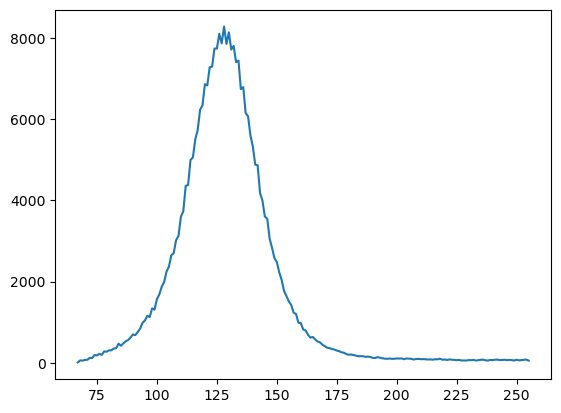

In [ ]:
x = np.arange(0,256,1)
filtered = list(filter(lambda x: x[0] > 0,
                        zip(
                            np.bincount(np.uint8((error & 0xFF) + 128)) - laplace.pdf(x,mu,b)*len(error)
                            , x)))
new_x = list(map(lambda x: x[1], filtered))
new_y = list(map(lambda x: x[0], filtered))
plt.plot(new_x, new_y)

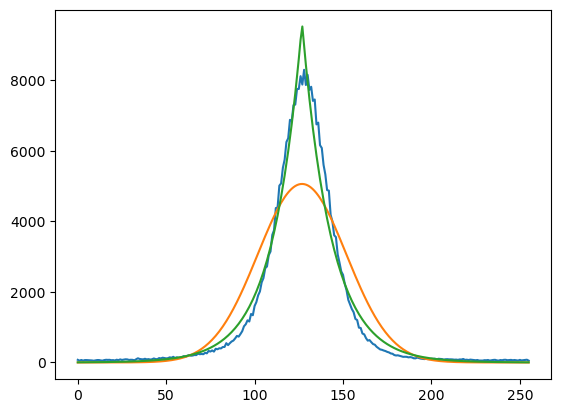

In [ ]:
new_estimator_data = []
for (i,x) in enumerate(np.bincount(np.uint8((error & 0xFF) + 128))):
    for _ in range(x):
        new_estimator_data.append(i)
std_dev = np.std(np.asarray(new_estimator_data))
mean = np.mean(np.asarray(new_estimator_data))
plt.plot(np.bincount(np.asarray(new_estimator_data)))
plt.plot(norm.pdf(np.asarray(range(256)), mean, std_dev)*len(error))
plt.plot(laplace.pdf(np.asarray(range(256)), mean, estimate_b_laplace(new_estimator_data,mean))*len(error))